In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [19]:
df = pd.read_csv('data.csv')
df.shape

(6819, 96)

In [20]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [21]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,bankrupt?,_roa(c)_before_interest_and_depreciation_before_interest,_roa(a)_before_interest_and_%_after_tax,_roa(b)_before_interest_and_depreciation_after_tax,_operating_gross_margin,_realized_sales_gross_margin,_operating_profit_rate,_pre-tax_net_interest_rate,_after-tax_net_interest_rate,_non-industry_income_and_expenditure/revenue,...,_net_income_to_total_assets,_total_assets_to_gnp_price,_no-credit_interval,_gross_profit_to_sales,_net_income_to_stockholder's_equity,_liability_to_equity,_degree_of_financial_leverage_(dfl),_interest_coverage_ratio_(interest_expense_to_ebit),_net_income_flag,_equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [94]:
df.describe()

,bankrupt?,_roa(c)_before_interest_and_depreciation_before_interest,_roa(a)_before_interest_and_%_after_tax,_roa(b)_before_interest_and_depreciation_after_tax,_operating_gross_margin,_realized_sales_gross_margin,_operating_profit_rate,_pre-tax_net_interest_rate,_after-tax_net_interest_rate,_non-industry_income_and_expenditure/revenue,...,_net_income_to_total_assets,_total_assets_to_gnp_price,_no-credit_interval,_gross_profit_to_sales,_net_income_to_stockholder's_equity,_liability_to_equity,_degree_of_financial_leverage_(dfl),_interest_coverage_ratio_(interest_expense_to_ebit),_net_income_flag,_equity_to_liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [22]:
df.isna().sum()

for column in df.columns:
    nullc = df[column].isna().sum()
    if nullc != 0:
        print(nullc)
print("no null values.")

no null values.


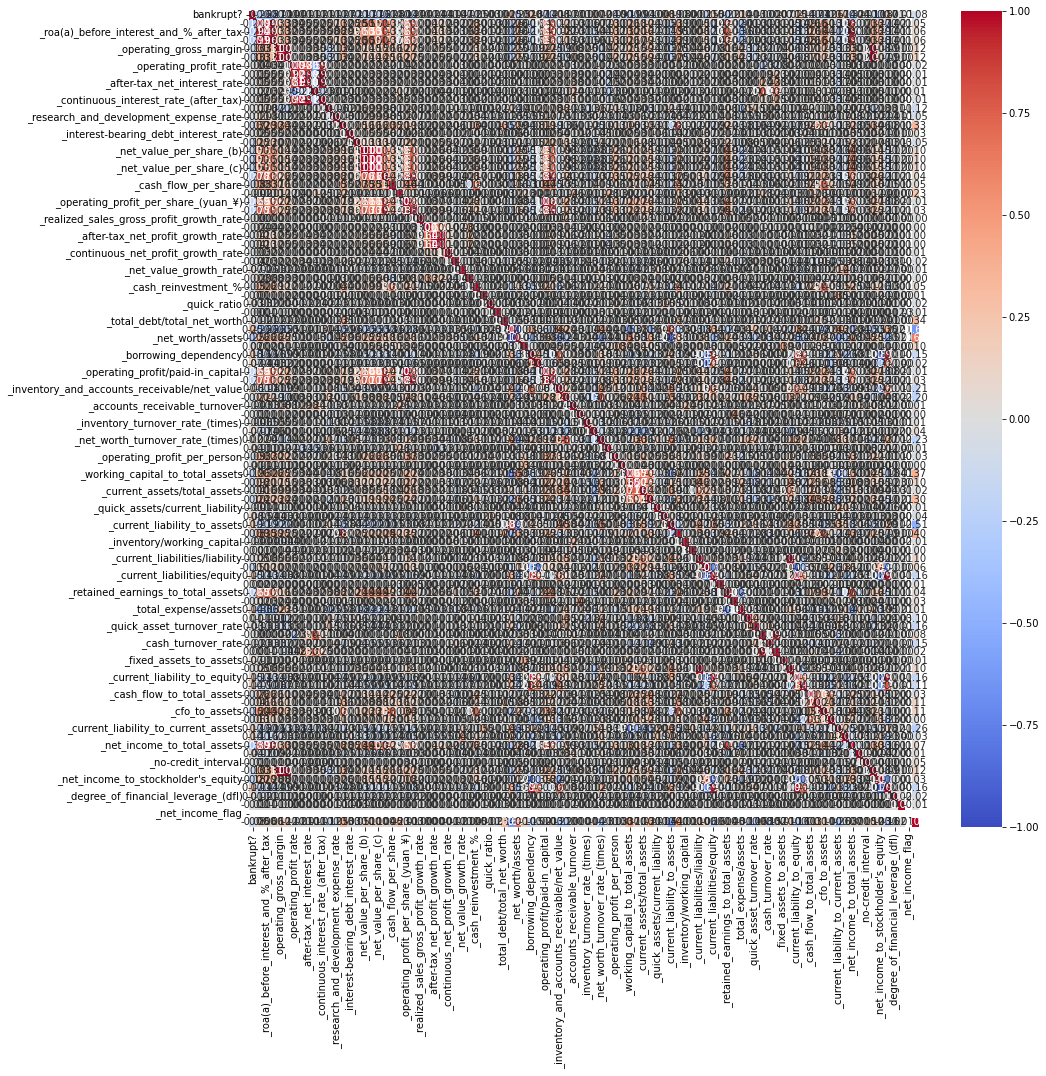

(6819, 77)

In [23]:
# REMOVE HIGHLY CORRELATED COLUMNS (>0.9)

correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

# Identify highly correlated features
threshold = 0.9  # You can adjust this threshold based on your needs
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
df_filtered = df.drop(columns=highly_correlated_features)
df_filtered.shape

In [24]:
correlation_matrix = df_filtered.corr()

# Create a heatmap to visualize the correlation matrix
# plt.figure(figsize=(15, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

# Identify highly correlated features
threshold = 0.005  # You can adjust this threshold based on your needs
low_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) < threshold:
            colname = correlation_matrix.columns[i]
            low_correlated_features.add(colname)

# Remove highly correlated features
df_filtered1 = df_filtered.drop(columns=low_correlated_features)
df_filtered1.shape

(6819, 11)

### Feature Selection

In [25]:
X = df.drop(columns=['bankrupt?'])
y = df['bankrupt?']

In [26]:
#SPLIT THE DATASET TO USE IT IN RFECV TO FIND OUT THE MOST RELEVANT COLUMNS

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=7986)

In [46]:
# WE USE THE SPLITTED DATASET TO FIND OUT WHICH COLUMNS ARE RELEVANT TO KEEP
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data and target variable
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFECV(estimator, step=1, cv=3)
selector = selector.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[selector.support_]
selected_features
# selected_features = ['_interest-bearing_debt_interest_rate',
#         '_persistent_eps_in_the_last_four_seasons',
#         '_per_share_net_profit_before_tax_(yuan_¥)', 
#         '_net_value_growth_rate',
#         '_quick_ratio', 
#         '_interest_expense_ratio', 
#         '_net_worth/assets',
#         '_borrowing_dependency', 
#         '_net_profit_before_tax/paid-in_capital',
#         '_accounts_receivable_turnover', 
#         '_fixed_assets_turnover_frequency',
#         '_cash/total_assets', 
#         '_cash/current_liability',
#         '_working_capital/equity', 
#         '_net_income_to_total_assets',
#         "_net_income_to_stockholder's_equity",
#         '_degree_of_financial_leverage_(dfl)', 
#         '_equity_to_liability', 
#         'bankrupt?']

In [53]:
df_reduced = df[selected_features]
df_reduced.shape

(6819, 19)

In [58]:
#remove the '?' from bankrupt column
df_reduced = df_reduced.copy()
df_reduced.rename(columns={'bankrupt?': 'bankrupt'}, inplace=True)


In [61]:
yes_bankrupt = df_reduced[df_reduced['bankrupt'] == 1]
no_bankrupt = df_reduced[df_reduced['bankrupt'] == 0]
yes_bankrupt.shape, no_bankrupt.shape

((220, 19), (6599, 19))

<AxesSubplot: >

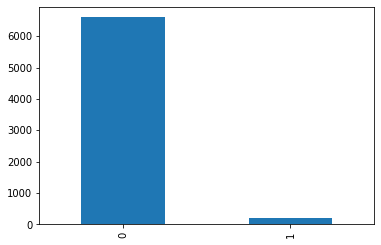

In [62]:
df_reduced['bankrupt'].value_counts().plot(kind='bar')

### Fix Data Imbalance

#### SMOTE:

In [63]:
df_reduced.head()

,_interest-bearing_debt_interest_rate,_persistent_eps_in_the_last_four_seasons,_per_share_net_profit_before_tax_(yuan_¥),_net_value_growth_rate,_quick_ratio,_interest_expense_ratio,_net_worth/assets,_borrowing_dependency,_net_profit_before_tax/paid-in_capital,_accounts_receivable_turnover,_fixed_assets_turnover_frequency,_cash/total_assets,_cash/current_liability,_working_capital/equity,_net_income_to_total_assets,_net_income_to_stockholder's_equity,_degree_of_financial_leverage_(dfl),_equity_to_liability,bankrupt
0,0.000725,0.169141,0.138736,0.000327,0.001208,0.629951,0.792424,0.390284,0.137757,0.001814,1.165007e-04,0.004094,1.473360e-04,0.721275,0.716845,0.827890,0.026601,0.016469,1
1,0.000647,0.208944,0.169918,0.000443,0.004039,0.635172,0.828824,0.376760,0.168962,0.001286,7.190000e+08,0.014948,1.383910e-03,0.731975,0.795297,0.839969,0.264577,0.020794,1
2,0.000790,0.180581,0.142803,0.000396,0.005348,0.629631,0.792484,0.379093,0.148036,0.001495,2.650000e+09,0.000991,5.340000e+09,0.742729,0.774670,0.836774,0.026555,0.016474,1
3,0.000449,0.193722,0.148603,0.000382,0.002896,0.630228,0.848535,0.379743,0.147561,0.001966,9.150000e+09,0.018851,1.010646e-03,0.729825,0.739555,0.834697,0.026697,0.023982,1
4,0.000686,0.212537,0.168412,0.000439,0.003727,0.636055,0.893491,0.375025,0.167461,0.001449,2.935211e-04,0.014161,6.804636e-04,0.732000,0.795016,0.839973,0.024752,0.035490,1


In [65]:
X = df_reduced.drop(columns=['bankrupt'])
y = df_reduced['bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=7986)

In [75]:
X_train.shape, X_test.shape

((5114, 18), (1705, 18))

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [68]:
X_train_SMOTE.shape, y_train_SMOTE.shape

((9890, 18), (9890,))

### Train and use Logistic Regrassion model

In [95]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_SMOTE, y_train_SMOTE)
pred = logistic_model.predict(X_test)


print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
print("accuracy: ",accuracy_score(y_test,pred))


precision:  0.0664451827242525
recall:  0.39215686274509803
f1:  0.11363636363636363
accuracy:  0.817008797653959


In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1373  281]
 [  31   20]]


### UnderSampling

In [89]:

no_bankrupt_undersampled = resample(no_bankrupt, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_bankrupt),
                                    random_state=0)

In [90]:
display(yes_bankrupt.shape)
display(no_bankrupt_undersampled.shape)

(220, 19)

(220, 19)